In [11]:
import os
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# experiment_names = [
#     "1rover_1hiddenpoi",
#     "1rover_1normalpoi",
#     "1uav_1rover_1hiddenpoi",
#     "1uav_1rover_1hiddenpoi_moregens"
# ]

experiment_results = {
    "1rover_1hiddenpoi" : {},
    "1rover_1normalpoi" : {},
    "1uav_1rover_1hiddenpoi" : {},
    "1uav_1rover_1hiddenpoi_moregens": {}
}

for result in experiment_results:
    experiment_results[result]["directory"] = "/home/gonzaeve/influence-shaping/results/preliminary/may_17/random_pois/"+result
    experiment_results[result]["config_dir"] = experiment_results[result]["directory"]+"/config.yaml"
    with open(experiment_results[result]["config_dir"], 'r') as file:
        experiment_results[result]["config"] = yaml.safe_load(file)
    experiment_results[result]["trials"] = []
    for num_trial in range(experiment_results[result]["config"]["experiment"]["num_trials"]):
        experiment_results[result]["trials"].append(pd.read_csv(experiment_results[result]["directory"]+"/trial_"+str(num_trial)+"/fitness.csv"))

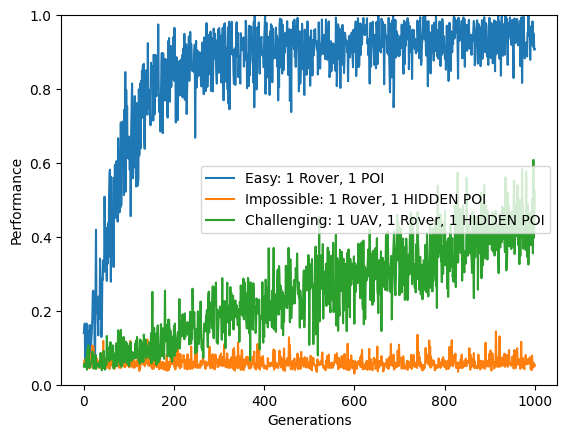

In [60]:
names = [
    "1rover_1normalpoi",
    "1rover_1hiddenpoi",
    "1uav_1rover_1hiddenpoi"
]

for res_name in names:
    fitnesses = []
    for t in experiment_results[res_name]["trials"]:
        fitnesses.append(t[" team_fitness"].to_numpy(dtype=float))
    fitnesses = np.array(fitnesses)

    avg = np.average(fitnesses, axis=0)
    std_dev = np.std(fitnesses, axis=0)
    std_err = std_dev / len(np.sqrt(experiment_results[res_name]["trials"]))

    gens = list(range(experiment_results[res_name]["config"]["ccea"]["num_generations"]+1))

    plt.plot(avg)
    # plt.fill_between(gens, avg+std_dev, avg-std_dev, alpha=0.2)
plt.legend(["Easy: 1 Rover, 1 POI", "Impossible: 1 Rover, 1 HIDDEN POI", "Challenging: 1 UAV, 1 Rover, 1 HIDDEN POI"], loc="center right")
plt.ylim([0,1.0])
plt.ylabel("Performance")
plt.xlabel("Generations")
plt.show()

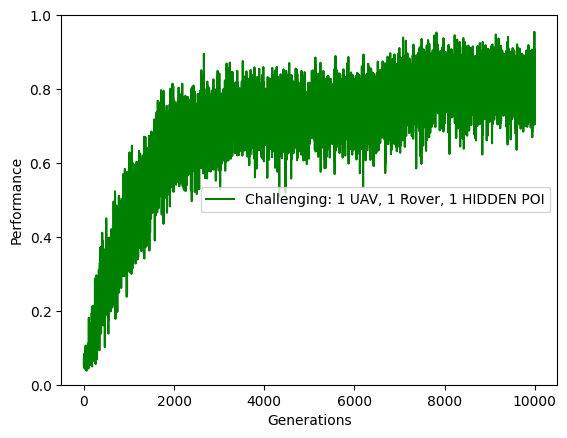

In [63]:
# Now let's see what happens when we give more generations to learn
names = [
    "1uav_1rover_1hiddenpoi_moregens"
]

for res_name in names:
    fitnesses = []
    for t in experiment_results[res_name]["trials"]:
        fitnesses.append(t[" team_fitness"].to_numpy(dtype=float))
    fitnesses = np.array(fitnesses)

    avg = np.average(fitnesses, axis=0)
    std_dev = np.std(fitnesses, axis=0)
    std_err = std_dev / len(np.sqrt(experiment_results[res_name]["trials"]))

    gens = list(range(experiment_results[res_name]["config"]["ccea"]["num_generations"]+1))

    plt.plot(avg, color="green")
    # plt.fill_between(gens, avg+std_dev, avg-std_dev, alpha=0.2)
plt.legend(["Challenging: 1 UAV, 1 Rover, 1 HIDDEN POI"], loc="center right")
plt.ylim([0,1.0])
plt.ylabel("Performance")
plt.xlabel("Generations")
plt.show()

# So they can learn, it just takes forever and doesn't converge onto 1.00